**Problem Statement:** To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

##Importing Skin Cancer Data

### Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import pathlib
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# Importing Data from Google Drive:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Defining path for Train and Test Image Sets:
data_path_train=pathlib.Path('/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
data_path_test=pathlib.Path('/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [4]:
len(list(data_path_train.glob('**/*.jpg')))

2239

In [5]:
len(list(data_path_test.glob('**/*.jpg')))

118

## Loading Images Using keras.preprocessing:

In [6]:
batch_size=32
img_height=180
img_width=180

### Splitting Train set in to "Training Data" and "Validation Data" sets:

In [7]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(data_path_train, seed=123, validation_split=0.2, subset='training', image_size=(img_height, img_width),
                                                                 batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(data_path_train, seed=123, validation_split=0.2, subset='validation', image_size=(img_height, img_width),
                                                                 batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [9]:
# Listing out classes of Skin Cancer
class_names=train_data.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Visualising the Data:

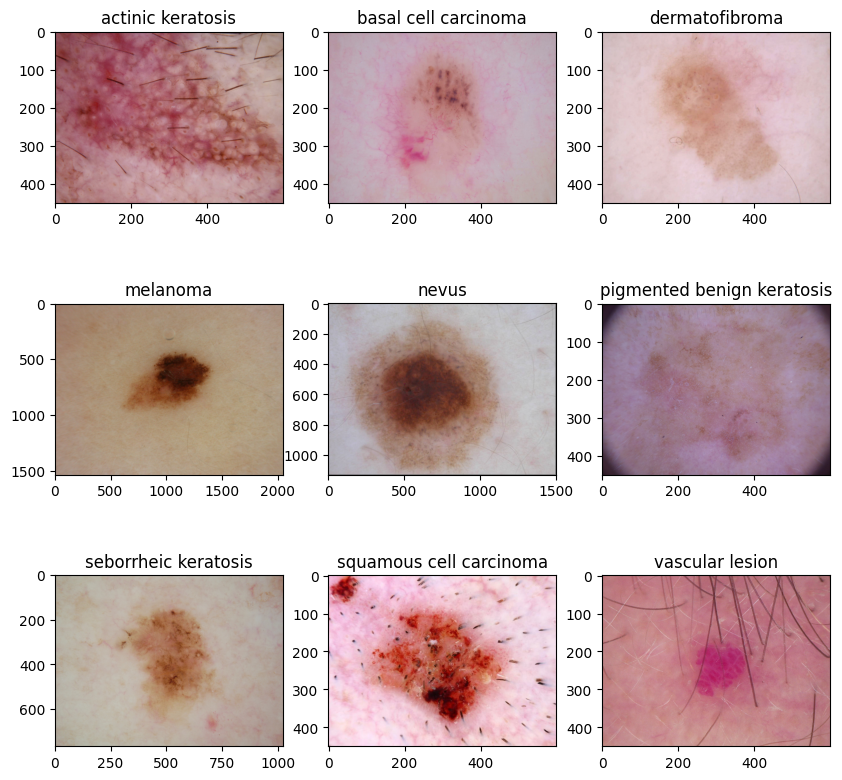

In [10]:
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(plt.imread(str(list(data_path_train.glob(class_names[i]+'/*.jpg'))[1])))
  plt.title(class_names[i])

The image_batch is a tensor of the shape (32,180,180,3). This is a batch of 32 images of shape (180,180,3).
The label_batch is a tensor of the shape (32, ) these are corresponding labels to 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.
Dataset.prefetch() overlaps data preprocessing and model execution while training

In [11]:
AUTOTUNE=tf.data.experimental.AUTOTUNE
train_data=train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_data=val_data.cache().prefetch(buffer_size=AUTOTUNE)

## Creating CNN Model:

**Using layers.experimental.preprocessing.Rescaling, the pixel values in image are normalized between (0,1) which is ideal of neural network.**

In [12]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Activation
class_num=9
model=Sequential()
input_s=(180,180,3)

In [13]:
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180,180,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',input_shape=input_s))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',input_shape=input_s))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512,activation='relu'))

model.add(Dense(class_num,activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                    

## Compiling the Model:

**'Adam' is chosen as the best optimizer, since it choses optimal learning rate for us.**
 ** As it is a multiclassification model, we used 'sparse_categorical_crossentropy' as loss function' **

In [15]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 64)       0         
 2D)                                                    

## Training the Model:

In [17]:
epoch=20
hist = model.fit(train_data, validation_data=val_data, epochs=epoch)

Epoch 1/20
56/56 [==============================] - 266s 960ms/step - loss: 2.1109 - accuracy: 0.2093 - val_loss: 1.9167 - val_accuracy: 0.2774
Epoch 2/20
56/56 [==============================] - 3s 62ms/step - loss: 1.8953 - accuracy: 0.3153 - val_loss: 1.8039 - val_accuracy: 0.3468
Epoch 3/20
56/56 [==============================] - 4s 64ms/step - loss: 1.6319 - accuracy: 0.4163 - val_loss: 1.5749 - val_accuracy: 0.4094
Epoch 4/20
56/56 [==============================] - 4s 63ms/step - loss: 1.5910 - accuracy: 0.4381 - val_loss: 1.4843 - val_accuracy: 0.5056
Epoch 5/20
56/56 [==============================] - 3s 62ms/step - loss: 1.4044 - accuracy: 0.5134 - val_loss: 1.4683 - val_accuracy: 0.4765
Epoch 6/20
56/56 [==============================] - 4s 65ms/step - loss: 1.2893 - accuracy: 0.5419 - val_loss: 1.3892 - val_accuracy: 0.5168
Epoch 7/20
56/56 [==============================] - 4s 64ms/step - loss: 1.2010 - accuracy: 0.5887 - val_loss: 1.5404 - val_accuracy: 0.5213
Epoch 8/20

## Visualising the Results:

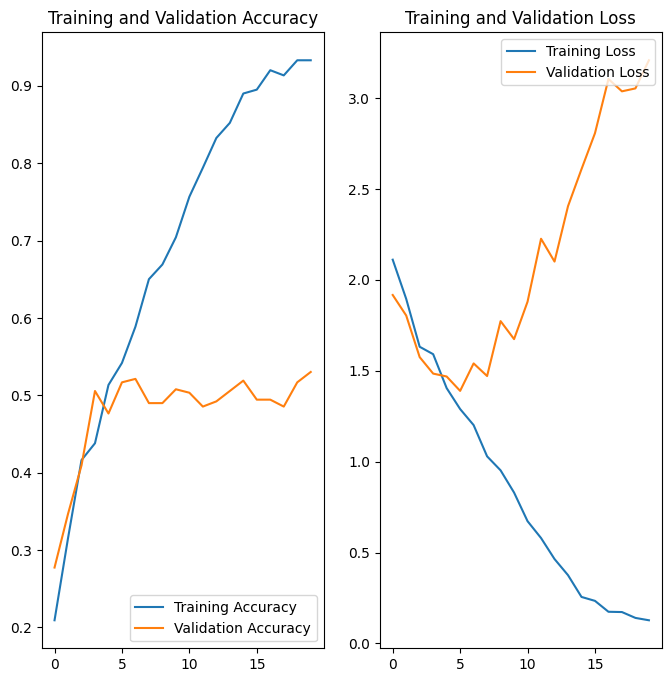

In [18]:
acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

loss=hist.history['loss']
val_loss=hist.history['val_loss']

epochs_range=range(epoch)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings:


1.   The training accuracy stands at 93.35 %
2.   The validation accuracy stands at 53.02 %
3.   This significant gap between accuracies suggest that Neural Network has *overfit* the model.
4.   It also suggestible to use 'drop out' function in the later model construction.





### Data Augmentation:

**'Augmentation' improves data diversity, thus enhnacing the models accuracy.
Here we applied flip, rotation and zoom randomly to some of the training set of pictures.**

In [19]:
aug_data=keras.Sequential([layers.experimental.preprocessing.RandomFlip(mode='horizontal_and_vertical',input_shape=(img_height,img_width,3)),
                           layers.experimental.preprocessing.RandomRotation(0.2,fill_mode='reflect'),
                           layers.experimental.preprocessing.RandomZoom(height_factor=(0.2,0.3),width_factor=(0.2,0.3),fill_mode='reflect')
                           ])

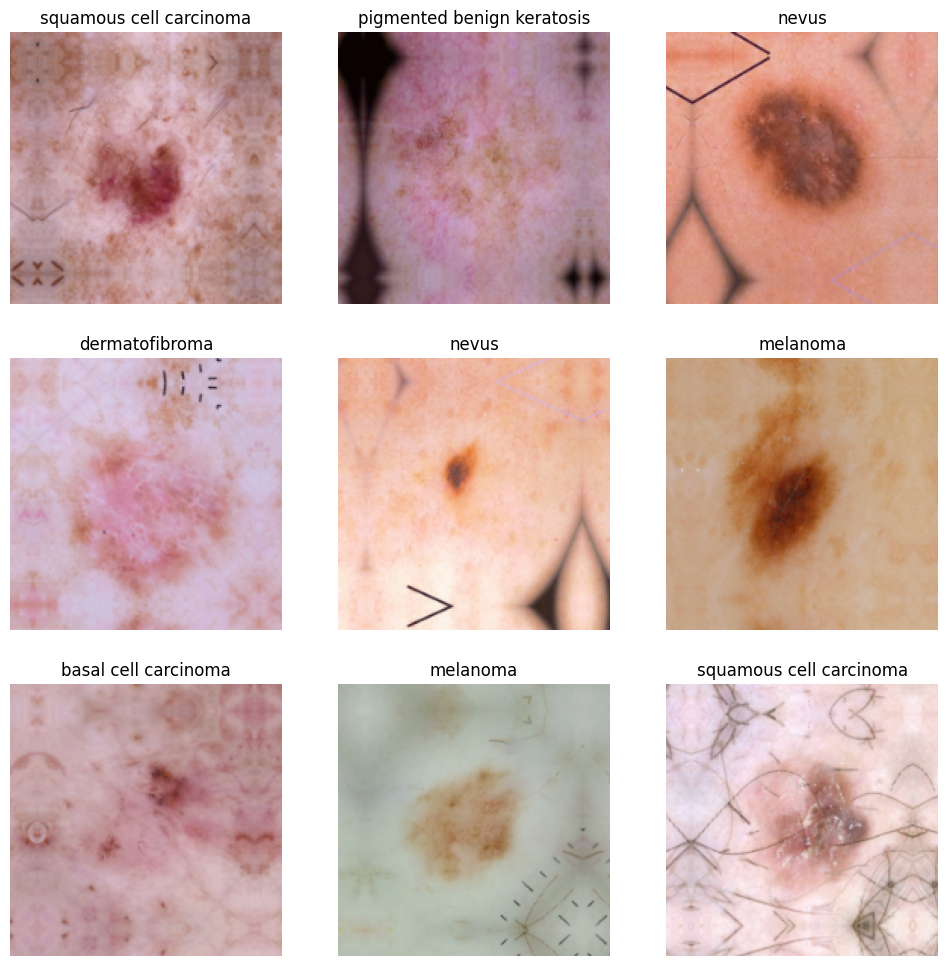

In [20]:
plt.figure(figsize=(12,12))
for images, label in train_data.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(aug_data(images)[i].numpy().astype('uint8'))
    plt.title(class_names[label[i]])
    plt.axis('off')

From above pictures, we can infer that rotation, zooming, flipping applied to some skin cancer categories. This helps the model to recognise skin cancer from getting trained by diversified images.


## Creating Model on Augmented Data:

In [21]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Activation, BatchNormalization
class_num=9
model=Sequential(aug_data)
input_s=(180,180,3)

In [22]:
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180,180,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',input_shape=input_s))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',input_shape=input_s))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))   # Adding Drop out to last dense layer to see if there would be improvement in performance of model.

model.add(Dense(class_num,activation='softmax'))  # Softmax is chosen, since we have to deal with multiclassification.

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 90, 90, 64)        18496     
                                                      

## Compiling the Model on Augmented Data:

In [23]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 90, 90, 64)        18496     
                                                      

## Training the Model on Augmented Data:

In [25]:
epoch=20
hist = model.fit(train_data, validation_data=val_data, epochs=epoch)

Epoch 1/20
56/56 [==============================] - 6s 69ms/step - loss: 2.1941 - accuracy: 0.2143 - val_loss: 1.9345 - val_accuracy: 0.2260
Epoch 2/20
56/56 [==============================] - 4s 65ms/step - loss: 1.8541 - accuracy: 0.3292 - val_loss: 1.7357 - val_accuracy: 0.3602
Epoch 3/20
56/56 [==============================] - 4s 67ms/step - loss: 1.5868 - accuracy: 0.4492 - val_loss: 1.8996 - val_accuracy: 0.3647
Epoch 4/20
56/56 [==============================] - 4s 65ms/step - loss: 1.5128 - accuracy: 0.4749 - val_loss: 1.5629 - val_accuracy: 0.4720
Epoch 5/20
56/56 [==============================] - 4s 66ms/step - loss: 1.4107 - accuracy: 0.5022 - val_loss: 1.4285 - val_accuracy: 0.5168
Epoch 6/20
56/56 [==============================] - 4s 69ms/step - loss: 1.4059 - accuracy: 0.4894 - val_loss: 1.4246 - val_accuracy: 0.5190
Epoch 7/20
56/56 [==============================] - 4s 68ms/step - loss: 1.4208 - accuracy: 0.5033 - val_loss: 1.4883 - val_accuracy: 0.4698
Epoch 8/20
56

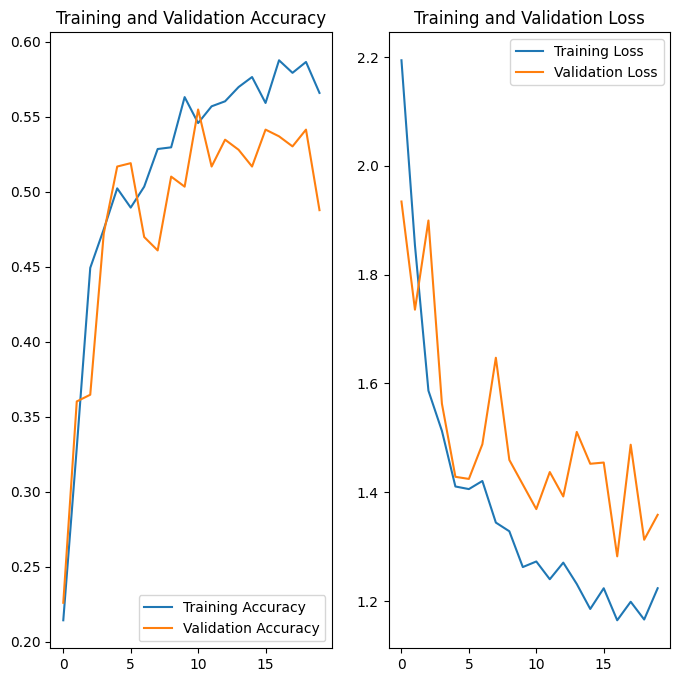

In [26]:
acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

loss=hist.history['loss']
val_loss=hist.history['val_loss']

epochs_range=range(epoch)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Findings:

From the above, we can infer that
* 'Overfitting' greatly reduced, because the difference between training and validation accuracies are insignificant.
* Training and validation accuracies of the last epoch are 56.58 %,  48.77 %
* Using Batch Normalization, resulted in more fluctuations in validation accuracies during epoch runs. Thus not included in the code here.
* Drop out function is used for last dense layer with value of 0.2 (means 20 % of the neurons in dense layer are not connected to the previous layer).

## Distribution of Skin Cancer Classes in Dataset:

In [27]:
pl=[]
sc=[]
for i in class_names:
  for j in data_path_train.glob(i+'/*.jpg'):
    pl.append(str(j))
    sc.append(i)
df=pd.DataFrame(list(zip(pl,sc)),columns=['path name','skin cancer category'])
df.head()

,path name,skin cancer category
0,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,actinic keratosis
1,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,actinic keratosis
2,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,actinic keratosis
3,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,actinic keratosis
4,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,actinic keratosis


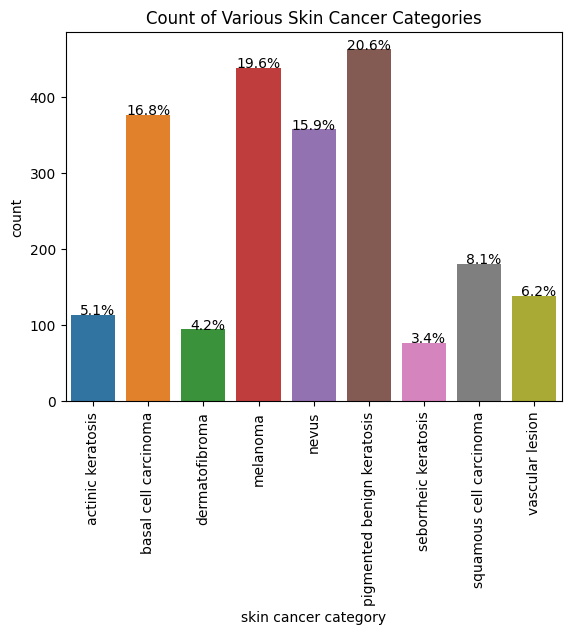

In [28]:
import seaborn as sns
g=sns.countplot(x='skin cancer category',data=df)
plt.xticks(rotation=90)
plt.title('Count of Various Skin Cancer Categories')
for i in g.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df))
    x = i.get_x() + i.get_width()
    y = i.get_height()
    g.annotate(percentage, (x, y),ha='right')
plt.show()

* From the above plot, we can see that 'dermatofibroma', 'seborrheic keratosis', 'actinic keratosis' are the classes that are under represented in the data set.
* Similarly, 'Melanoma', 'Nevus', 'Pigmented bening keratosis', 'basal cell carcinoma' are the classes that are dominant in the data set.
* This results in the neural network that is biased towards the major classes and not able to detect minor classes, since they are low in number.
* To rectify this imbalance, we can use 'Augmentor' Pipe line to populate the under represented skin cancer classes.

### Rectifying Class Imbalance using 'Augmentor':

'augmentor' is useful to generate more samples thus making under represented skin cancer classes more populated which would result in non bias neural network model.

In [29]:
!pip install augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
path_to_training_dataset='/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'
import Augmentor
for i in class_names:
  p=Augmentor.Pipeline(path_to_training_dataset+i)
  p.rotate(probability=0.7,max_left_rotation=10,max_right_rotation=10)
  p.sample(500)
  # The generated images are stored in 'output' folder in the respective skin cancer classes folder.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F27A452F8E0>: 100%|██████████| 500/500 [00:28<00:00, 17.68 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F27A4481F30>: 100%|██████████| 500/500 [00:29<00:00, 17.22 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F27A457BA30>: 100%|██████████| 500/500 [00:23<00:00, 21.51 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F27A42E8340>: 100%|██████████| 500/500 [01:58<00:00,  4.23 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F27A430F520>: 100%|██████████| 500/500 [01:44<00:00,  4.76 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F27D5D269E0>: 100%|██████████| 500/500 [00:23<00:00, 21.51 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F27A43F9DE0>: 100%|██████████| 500/500 [00:52<00:00,  9.57 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F27A43FA620>: 100%|██████████| 500/500 [00:23<00:00, 21.43 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F27E2FA91E0>: 100%|██████████| 500/500 [00:22<00:00, 21.74 Samples/s]


In [31]:
image_count_train = len(list(data_path_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


The number of generated images using Augmentor pipeline is 4500 (for total of 9 skin cancer classes)

In [32]:
data_path_train1=pathlib.Path('/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
pl1=[]
sc1=[]
for i in class_names:
  for j in data_path_train1.glob(i+'/output/*.jpg'):
    pl1.append(str(j))
    sc1.append(i)
df1=pd.DataFrame(list(zip(pl1,sc1)),columns=['path name','skin cancer category'])
df1.shape

(4500, 2)

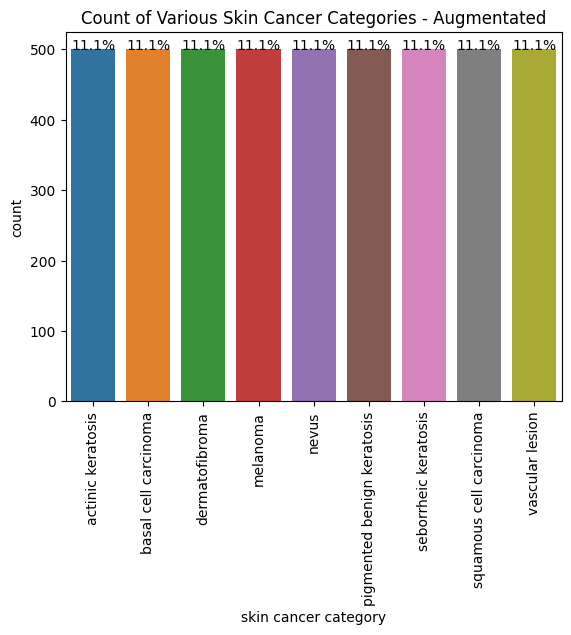

In [33]:
import seaborn as sns
g1=sns.countplot(x='skin cancer category',data=df1)
plt.xticks(rotation=90)
plt.title('Count of Various Skin Cancer Categories - Augmentated')
for i in g1.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df1))
    x = i.get_x() + i.get_width()
    y = i.get_height()
    g1.annotate(percentage, (x, y),ha='right')
plt.show()

In [34]:
df2=pd.concat([df,df1],axis=0)
df2.shape

(6739, 2)

## Distribution of Skin Cancer Classes after Augmentor Pipeline:

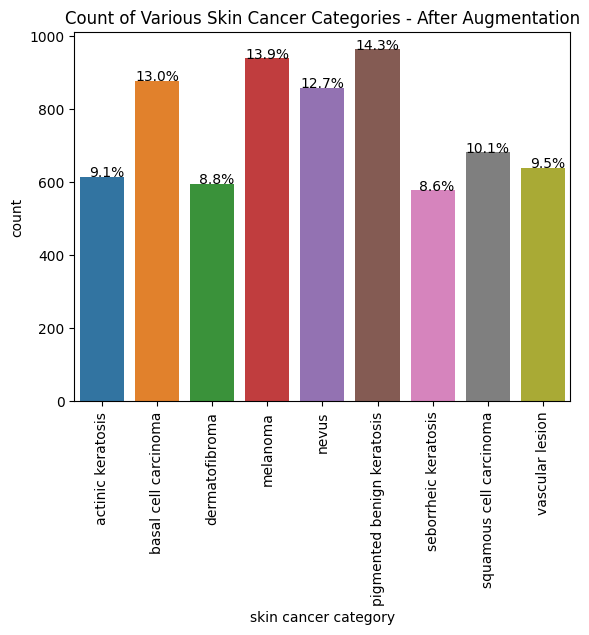

In [35]:
import seaborn as sns
g3=sns.countplot(x='skin cancer category',data=df2)
plt.xticks(rotation=90)
for i in g3.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height()/len(df2))
    x = i.get_x() + i.get_width()
    y = i.get_height()
    g3.annotate(percentage, (x, y),ha='right')
plt.title('Count of Various Skin Cancer Categories - After Augmentation')
plt.show()

* From the above plot, we can see that previously under represented classes like 'dermatofibroma', 'seborrheic keratosis', 'actinic keratosis' are more represented now and their percentage increase from average of 5 % to 9% approximately.

In [36]:
len(list(data_path_train1.glob('**/*.jpg')))

6739

### Creating the Model on the data generated by Augmentor:

In [37]:
batch_size=32
img_height=180
img_width=180

In [38]:
train_data1 = tf.keras.preprocessing.image_dataset_from_directory( data_path_train1, seed=123, validation_split = 0.2, subset = 'training', image_size=(img_height, img_width),
                                                                  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [39]:
val_data1 = tf.keras.preprocessing.image_dataset_from_directory( data_path_train1, seed=123, validation_split = 0.2, subset = 'validation', image_size=(img_height, img_width),
                                                                  batch_size=batch_size)


Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [45]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Activation, BatchNormalization
class_num=9
model1=Sequential(aug_data)
input_s=(180,180,3)

In [46]:
model1.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180,180,3)))
model1.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',input_shape=input_s))
model1.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',input_shape=input_s))
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Dropout(0.15))

model1.add(Flatten())

model1.add(Dense(512,activation='relu'))
model1.add(Dropout(0.2))

model1.add(Dense(class_num,activation='softmax'))

model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 conv2d_18 (Conv2D)          (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 90, 90, 64)        18496     
                                                      

### Compiling the Model on Augmentor Data:

In [47]:
model1.compile(optimizer='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [48]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 conv2d_18 (Conv2D)          (None, 180, 180, 32)      9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 90, 90, 64)        18496     
                                                      

### Training the Model on Augmentor Data:

In [49]:
epoch1=30
hist1 = model1.fit(train_data1, validation_data=val_data1, epochs=epoch1)

Epoch 1/30
169/169 [==============================] - 49s 260ms/step - loss: 1.9838 - accuracy: 0.2537 - val_loss: 1.5711 - val_accuracy: 0.3942
Epoch 2/30
169/169 [==============================] - 41s 233ms/step - loss: 1.6537 - accuracy: 0.3667 - val_loss: 1.4632 - val_accuracy: 0.4254
Epoch 3/30
169/169 [==============================] - 41s 235ms/step - loss: 1.4802 - accuracy: 0.4288 - val_loss: 1.3671 - val_accuracy: 0.4566
Epoch 4/30
169/169 [==============================] - 41s 236ms/step - loss: 1.4228 - accuracy: 0.4562 - val_loss: 1.3620 - val_accuracy: 0.4840
Epoch 5/30
169/169 [==============================] - 41s 238ms/step - loss: 1.3515 - accuracy: 0.4785 - val_loss: 1.3117 - val_accuracy: 0.5041
Epoch 6/30
169/169 [==============================] - 41s 237ms/step - loss: 1.3255 - accuracy: 0.4907 - val_loss: 1.2622 - val_accuracy: 0.5071
Epoch 7/30
169/169 [==============================] - 42s 241ms/step - loss: 1.2687 - accuracy: 0.5069 - val_loss: 1.2064 - val_ac

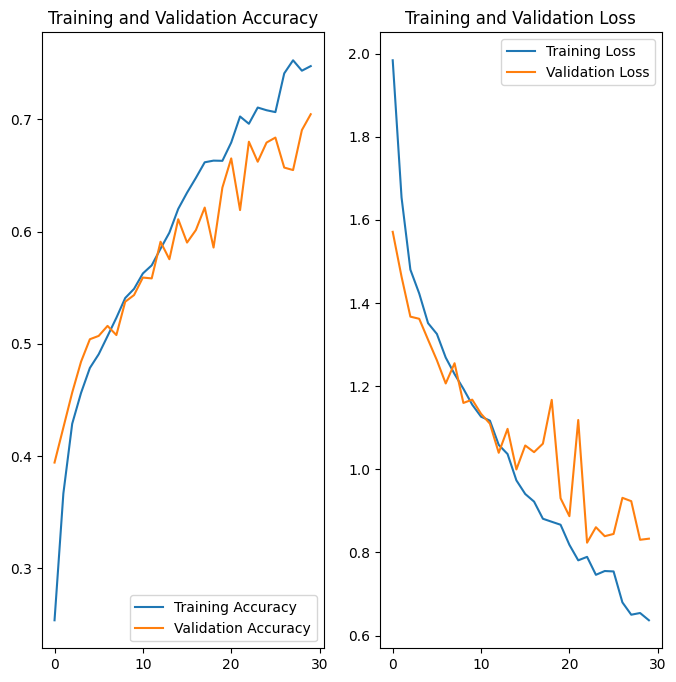

In [50]:
acc1=hist1.history['accuracy']
val_acc1=hist1.history['val_accuracy']

loss1=hist1.history['loss']
val_loss1=hist1.history['val_loss']

epochs_range1=range(epoch1)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range1,acc1,label='Training Accuracy')
plt.plot(epochs_range1,val_acc1,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range1,loss1,label='Training Loss')
plt.plot(epochs_range1,val_loss1,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

###Findings

* From the above picture, we can see that training and validation accuracy of the last epoch are: 74.74%  and 70.45% suggesting that overfit problem has been solved.
* Reclassification with Augmentor gave more training data for model to get trained.
* But the validation accuracy of 61% suggests more improvement to be done on the model, such as adding drop out to the remaining previous layers.
* The fluctuations in validation accuracy is due to batch normalization function added to the layers.
* For this problem, it has been observed that 'batch normalization' is decreasing validation accuracy of the model. Thus it is advisable to construct a model by adding dropouts and removing batch normalization.
* Due to computational constraint, adding dropout to the remaining layers has been not done in this question.

### Testing the Model on Test Data set:

1/1 [==============================] - 0s 339ms/step
Actual Class:  dermatofibroma
Predictive Class:   dermatofibroma


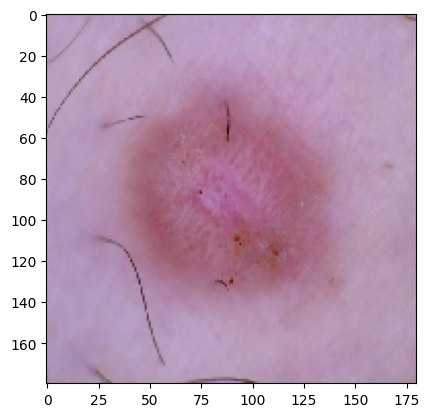

In [51]:
from glob import glob
from tensorflow.keras.preprocessing.image import load_img
test_img_path = os.path.join(data_path_test, class_names[2], '*')
test_img = glob(test_img_path)
test_img = load_img(test_img[-1],target_size=(180,180,3))
plt.imshow(test_img)
plt.grid(False)

img = np.expand_dims(test_img,axis=0)
pred = model1.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class:  "+ class_names[2] +'\n'+ "Predictive Class:   "+pred_class )